In [1]:
from tz.osemosys import Model

# run model
iso_code = 'PAK'
model = Model.from_yaml(f"../models/{iso_code}/")
model.solve()

Running HiGHS 1.5.3 [date: 2023-05-16, git hash: 594fa5a9d]
Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
1029 rows, 1029 cols, 3066 nonzeros
869 rows, 869 cols, 2683 nonzeros
704 rows, 704 cols, 2353 nonzeros
594 rows, 594 cols, 2133 nonzeros
552 rows, 518 cols, 2004 nonzeros
Presolve : Reductions: rows 552(-1506); columns 518(-2660); elements 2004(-4380)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     4.0875574555e+06 Pr: 126(939000) 0s
        353     5.9768154650e+06 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 353
Objective value     :  5.9768154650e+06
HiGHS run time      :          0.00


True

In [2]:
model.solution

<xarray.Dataset> Size: 86kB
Dimensions:                                              (REGION: 7,
                                                          STORAGE: 0, YEAR: 3,
                                                          SEASON: 3,
                                                          DAYTYPE: 1,
                                                          TECHNOLOGY: 6,
                                                          TIMESLICE: 6,
                                                          MODE_OF_OPERATION: 1,
                                                          _REGION: 7, FUEL: 1,
                                                          EMISSION: 1)
Coordinates:
  * REGION                                               (REGION) <U3 84B 'PK...
  * STORAGE                                              (STORAGE) object 0B 
  * YEAR                                                 (YEAR) int64 24B 202...
  * SEASON                                               (SEASON) <U1 12B '1'...
  * DAYTYPE                                              (DAYTYPE) <U1 4B '1'
  * TECHNOLOGY                                           (TECHNOLOGY) <U8 192B ...
  * TIMESLICE                                            (TIMESLICE) <U2 48B ...
  * MODE_OF_OPERATION                                    (MODE_OF_OPERATION) <U3 12B ...
  * _REGION                                              (_REGION) <U3 84B 'P...
  * FUEL                                                 (FUEL) <U3 12B 'ELC'
  * EMISSION                                             (EMISSION) <U3 12B '...
Data variables: (12/64)
    StorageLevelYearStart                                (REGION, STORAGE, YEAR) float64 0B ...
    StorageLevelYearFinish                               (REGION, STORAGE, YEAR) float64 0B ...
    StorageLevelSeasonStart                              (REGION, STORAGE, SEASON, YEAR) float64 0B ...
    StorageLevelDayTypeStart                             (REGION, STORAGE, SEASON, DAYTYPE, YEAR) float64 0B ...
    StorageLevelDayTypeFinish                            (REGION, STORAGE, SEASON, DAYTYPE, YEAR) float64 0B ...
    StorageLowerLimit                                    (REGION, STORAGE, YEAR) float64 0B ...
    ...                                                   ...
    RateOfProductionByTechnologyWithReserveMargin        (REGION, TECHNOLOGY, YEAR, FUEL, TIMESLICE) float64 6kB ...
    RateOfProductionWithReserveMargin                    (REGION, YEAR, FUEL, TIMESLICE, MODE_OF_OPERATION) float64 1kB ...
    marginal_cost_of_demand                              (REGION, YEAR, FUEL, TIMESLICE) float64 1kB ...
    marginal_cost_of_demand_annual                       (REGION, YEAR, FUEL) float64 168B ...
    marginal_cost_of_emissions_annual                    (REGION, YEAR, EMISSION) float64 168B ...
    marginal_cost_of_emissions_total                     (REGION, EMISSION) float64 56B ...

<Axes: xlabel='YEAR'>

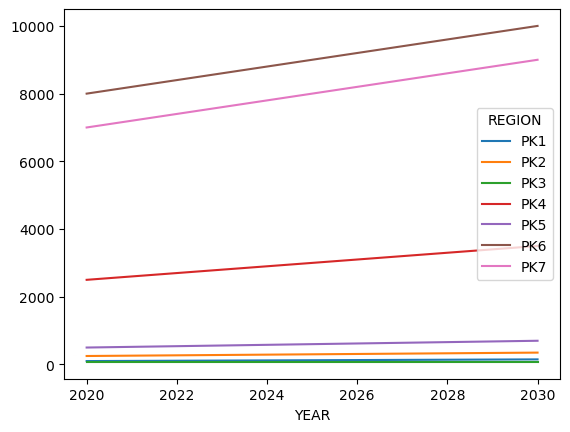

In [8]:
# plot generation
gen = (
    model
    .solution
    .Production
    .to_dataframe()
    .reset_index()
    .pivot_table(
        index='YEAR', 
        columns='REGION', 
        values='Production',
        aggfunc='sum',
    )
)

gen.plot()